<a href="https://colab.research.google.com/github/zangell44/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [120]:
import numpy as np
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean(numbers):
  return sum(numbers) / len(numbers)

def variance(numbers): # assumes population variance
  x = mean(numbers)
  return sum([(i-x)**2 for i in numbers]) / len(numbers)

def stddev(numbers):
  return variance(numbers)**0.5

print ('Mean', mean(sales))
print ('Variance', variance(sales))
print ('Standard Deviation', stddev(sales))

Mean 3052.714285714286
Variance 183761.06122448976
Standard Deviation 428.67360686714756


Check:

In [121]:
print ('Mean', np.mean(sales))
print ('Variance', np.var(sales))
print ('Standard Deviation', np.std(sales))

Mean 3052.714285714286
Variance 183761.06122448976
Standard Deviation 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [122]:
visits = [127, 80, 105, 92, 120, 115, 93]

sales = np.array(sales)
visits = np.array(visits)

print ('Covariance:', np.cov(sales, visits, ddof=0)[0][1])

Covariance: 6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [123]:
print ('Standard Deviation of Customer visits', stddev(visits))

# standardize to find correlation coefficient
print ('Correlation Coefficient', np.cov(sales, visits, ddof=0)[0][1] / (stddev(sales) * stddev(visits)))

Standard Deviation of Customer visits 15.792015549069118
Correlation Coefficient 0.9628339778148909


Check:

In [124]:
print ('Standard Deviation of Customer visits', np.std(visits))
print ('Correlation Coefficient', np.corrcoef(sales,visits)[0][1])

Standard Deviation of Customer visits 15.792015549069118
Correlation Coefficient 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',index_col=0)

In [126]:
# variance - covariance matrix
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [127]:
# correlation matrix
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-2.0, 2.0)

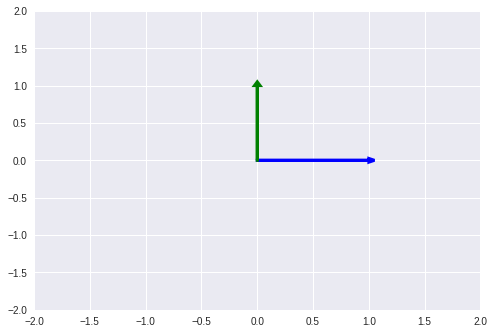

In [128]:
import matplotlib.pyplot as plt

vec1 = [1,0]
vec2 = [0,1]

def plot_vector(vector, ax, color='blue'):
  ax.arrow(0,0,vector[0],vector[1], linewidth=3, head_width=.05, head_length=0.05, color=color)

fig, ax = plt.subplots()
plot_vector(vec1, ax)
plot_vector(vec2, ax, color='green')

ax.set_xlim(-2.0,2.0)
ax.set_ylim(-2.0,2.0)

Perpendicular is a synonym for orthogonal.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [129]:
a = [-5, 3, 7]
b = [6, -8, 2]
print (np.dot(a, b))

-40


They are not orthogonal. If they were, the dot product of the two would be equal to zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [176]:
c = [2, -15, 6, 20]
c_mat = np.mat(c)

print (np.linalg.norm(c)**2)
print (np.dot(c,c))
print (np.matmul(c_mat,c_mat.T)) # assuming c is column vector, we have to reverse the order here

665.0
665
[[665]]


These quantities are all different ways of computing the length of a vector. Each quantity results in the sum of squared components.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8 \hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [131]:
f = [4, 12, 11, 9, 2]
f_norm = np.linalg.norm(f)
f_unit = [i/f_norm for i in f]
print ('Unit Vector:', f_unit)

Unit Vector: [0.20908334939572668, 0.62725004818718, 0.5749792108382483, 0.470437536140385, 0.10454167469786334]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

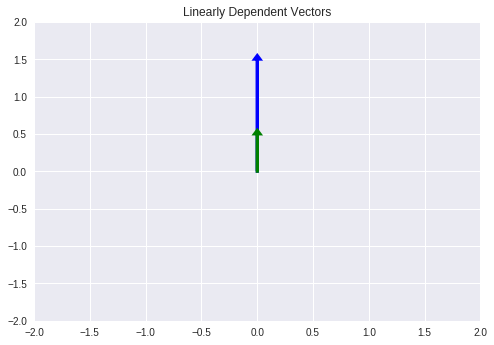

In [132]:
# linearly dependent
fig, ax = plt.subplots()
vec_a = [0, 1.5]
vec_b = [0, 0.5]

plot_vector(vec_a, ax)
plot_vector(vec_b, ax, color='green')

ax.set_title('Linearly Dependent Vectors')
ax.set_xlim(-2.0,2.0)
ax.set_ylim(-2.0,2.0)
plt.show()

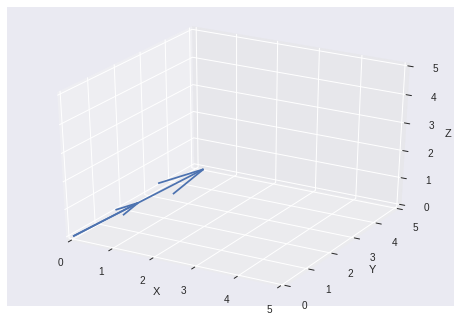

In [178]:
# linearly dependent in R^3
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,2,2,2, length=1)
ax.quiver(0,0,0,1,1,1, length=1)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

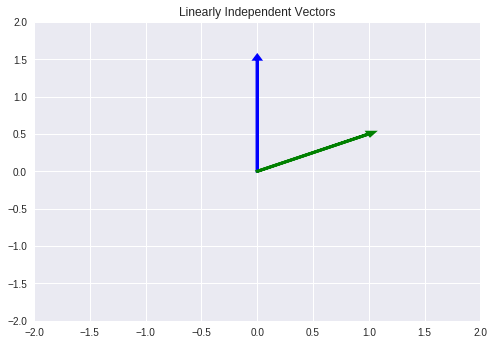

In [133]:
# linearly independent
fig, ax = plt.subplots()
vec_a = [0, 1.5]
vec_b = [1, 0.5]

plot_vector(vec_a, ax)
plot_vector(vec_b, ax, color='green')

ax.set_title('Linearly Independent Vectors')
ax.set_xlim(-2.0,2.0)
ax.set_ylim(-2.0,2.0)
plt.show()

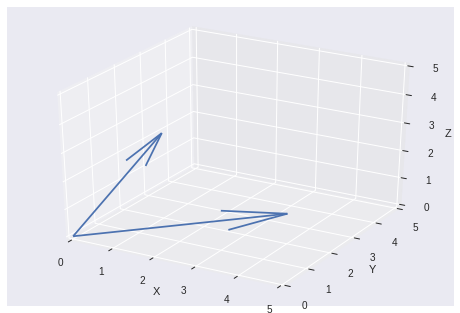

In [179]:
# linearly independent in R^3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,1,2,3, length=1)
ax.quiver(0,0,0,4,2,1, length=1)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Because g and h are linearly dependent, their span is $\mathbb{R}^1$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Because l, m, and n are all linearly independent, their span is $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



For this, we can use any two linearly independent two dimensional vectors. If we were being overcomplicated, we could also use two vectors with more than two dimensions, as long as they span $\mathbb{R}^2$

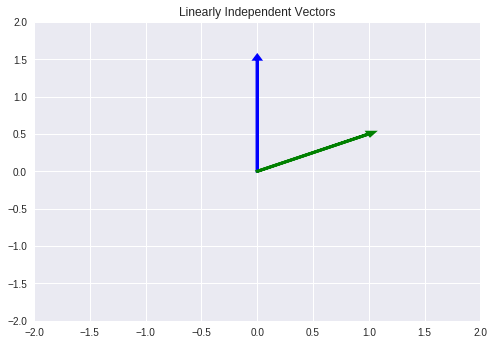

In [134]:
# linearly independent
fig, ax = plt.subplots()
vec_a = [0, 1.5]
vec_b = [1, 0.5]

plot_vector(vec_a, ax)
plot_vector(vec_b, ax, color='green')

ax.set_title('Linearly Independent Vectors')
ax.set_xlim(-2.0,2.0)
ax.set_ylim(-2.0,2.0)
plt.show()

## 6.2 What does it mean to form a basis?

A basis of a vector space (e.g. $\mathbb{R}^2$) is formed by a set of linearly independent vectors which span the vector space.

Put more simply, this means that we can create linear combinations of the basis vectors to get any possibly vector in the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [135]:
P = np.mat('1 2 3; -1 0 7; 4 8 2')
print ('Rank of P:', np.linalg.matrix_rank(P))

Rank of P: 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the number of dimensions spanned by its column vectors.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

Projection of w onto L: [0.5 1.5]


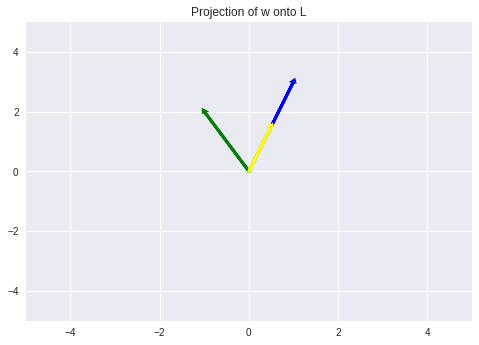

In [136]:
v = [1, 3]
w = [-1, 2]

def projection(w, v):
  """
  Returns a vector projecting vector w onto a dimensional structure formed by
  scaling vector v
  """
  return np.multiply((np.dot(w,v) / np.dot(v,v)),v) 

proj = projection(w,v)
print ('Projection of w onto L:', proj)

# graphically
fig, ax = plt.subplots()
plot_vector(v, ax)
plot_vector(w, ax, color='green')
plot_vector(proj, ax, color='yellow')

ax.set_title('Projection of w onto L')
ax.set_xlim(-5.0,5.0)
ax.set_ylim(-5.0,5.0)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

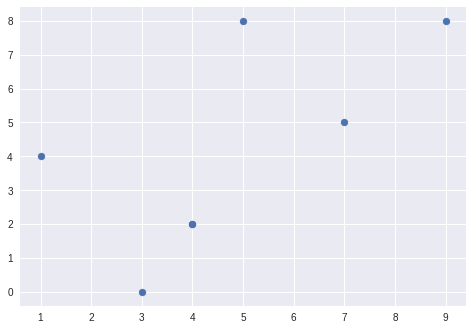

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

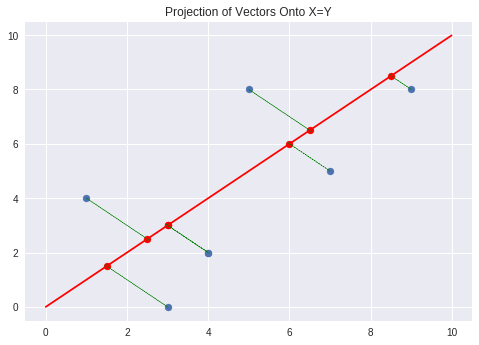

In [173]:
line = [1,1] # projection for x = y
x_line = np.arange(0,10,0.01)
y_line = x_line

x_proj = []
y_proj = []

for vector in zip(x_values, y_values):
  proj = projection(vector, line)
  x_proj.append(proj[0])
  y_proj.append(proj[1])

# plotting
fig_proj, ax_proj = plt.subplots()

ax_proj.scatter(x_values, y_values)
ax_proj.scatter(x_proj, y_proj, c='red')
ax_proj.plot(x_line, y_line, c='red')

# plot original points as vectors - kind of clutters things up
# for vec in zip(x_values, y_values):
#   ax_proj.arrow(0,0, vec[0], vec[1], linewidth=0.5, linestyle='--', head_width=.2, head_length=0.05, color='blue')

# plot orthogonal lines
for vec in zip(x_values, y_values, x_proj, y_proj):
  ax_proj.arrow(vec[0], vec[1], vec[2]-vec[0], vec[3]-vec[1], linewidth=0.5, linestyle='--', head_width=.2, head_length=0.05, color='green')

ax_proj.set_title('Projection of Vectors Onto X=Y')

plt.show()